<a href="https://colab.research.google.com/github/alejandraberbesi/Notebooks_DA/blob/main/5_Caso_practico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fuente dataset: https://www.kaggle.com/datasets/mohamed044hamedy/superstoredata

**NOTA:** Recuerda descargar el archivo desde la fuente, guardarlo en tu Google Drive y luego cambiar la ruta correspondiente para poder ejecutar este notebook

### Descripcion variables

* Order ID: ID de pedido único para cada cliente.
* Order Date: Fecha de pedido del producto.
* Ship Date: Fecha de envío del producto.
* Ship Mode: Modo de envío especificado por el cliente.
* Customer Name: Nombre del cliente.
* Segment: El segmento al que pertenece el cliente.
* State: Estado de residencia del cliente.
* Country: País de residencia del cliente.
* Market: El mercado del producto.
* Region: Región a la que pertenece el cliente.
* Product ID: ID único del producto.
* Category: Categoría del producto pedido.
* Sub-Category: Subcategoría del producto pedido.
* Product Name: Nombre del producto.
* Unit Price: El precio por unidad.
* Quantity: Cantidad del producto.
* Discount: Descuento proporcionado.
* Shipping Cost: El costo de envío.
* Order Priority: Los artículos enviados con prioridad se envían por aire, lo que resulta en tiempos de entrega más rápidos.
* Sales: Ventas del producto.
* Expenses: Los gastos son los costos de operación que una empresa incurre para generar ingresos.
* Revenue: Los ingresos se refieren a las ganancias totales.
* Year: Año de las ventas.

In [ ]:
from google.colab import drive #para conectar con google drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/superprof/Python/Analisis de datos/Datasets/superstore_dataset.xlsx')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name.5,Unit Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,NaN,211,2,0.0,35.46,Medium,422,397.9902,457.46,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,NaN,129,3,0.1,9.72,Medium,387,311.4774,358.02,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,NaN,128,4,0.0,8.17,High,512,452.5479,520.17,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,NaN,177,3,0.5,4.82,High,531,235.1784,270.32,2011
4,CA-2011-1510,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,NaN,222,5,0.1,4.70,Medium,1110,873.2190,1003.70,2088


In [ ]:
df.shape

(51318, 28)

In [ ]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'product_name.1',
       'product_name.2', 'product_name.3', 'product_name.4', 'product_name.5',
       'Unit Price', 'quantity', 'discount', 'shipping_cost', 'order_priority',
       'sales', 'expenses', 'revenue ', 'year'],
      dtype='object')

In [ ]:
#para quitar el espacio despues de revenue en el nombre
df.columns = df.columns.str.strip()

In [ ]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'product_name.1',
       'product_name.2', 'product_name.3', 'product_name.4', 'product_name.5',
       'Unit Price', 'quantity', 'discount', 'shipping_cost', 'order_priority',
       'sales', 'expenses', 'revenue', 'year'],
      dtype='object')

# Entendiendo las Variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51318 entries, 0 to 51317
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51297 non-null  object        
 1   order_date      51318 non-null  datetime64[ns]
 2   ship_date       51318 non-null  datetime64[ns]
 3   ship_mode       51318 non-null  object        
 4   customer_name   51318 non-null  object        
 5   segment         51318 non-null  object        
 6   state           51318 non-null  object        
 7   country         51318 non-null  object        
 8   market          51318 non-null  object        
 9   region          51318 non-null  object        
 10  product_id      51297 non-null  object        
 11  category        51318 non-null  object        
 12  sub_category    51318 non-null  object        
 13  product_name    51318 non-null  object        
 14  product_name.1  43540 non-null  object        
 15  pr

Por que hay tantas columnas de producto con valores nulos?

In [ ]:
df[df['product_name.3'].notna()][['product_name', 'product_name.1', 'product_name.2', 'product_name.3', 'product_name.4', 'product_name.5']].head()

,product_name,product_name.1,product_name.2,product_name.3,product_name.4,product_name.5
38,Message Book,Wirebound,"Four 5 1/2"" X 4"" Forms/Pg.",200 Dupl. Sets/Book,NaN,NaN
498,Message Book,"Standard Line ""While You Were Out""","5 1/2"" X 4""",200 Sets/Book,NaN,NaN
775,Message Book,Wirebound,"Four 5 1/2"" X 4"" Forms/Pg.",200 Dupl. Sets/Book,NaN,NaN
990,Geographics Note Cards,Blank,White,"8 1/2"" x 11""",NaN,NaN
1145,Wilson Jones Ledger-Size,Piano-Hinge Binder,"2""",Blue,NaN,NaN


In [ ]:
#comportamiento variables numericas
df.describe(include=[np.number])

,Unit Price,quantity,discount,shipping_cost,sales,expenses,revenue,year
count,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000
mean,237.682314,3.476071,0.142907,26.365946,826.174305,641.180059,736.988574,2012.778713
std,126.278644,2.278623,0.212283,57.284882,752.664627,609.041486,700.047685,1.149308
min,19.000000,1.000000,0.000000,0.000000,19.000000,4.489200,5.160000,2001.000000
25%,128.000000,2.000000,0.000000,2.610000,296.000000,217.439100,249.930000,2012.000000
50%,238.000000,3.000000,0.000000,7.790000,604.000000,448.367550,515.365000,2013.000000
75%,347.000000,5.000000,0.200000,24.440000,1125.000000,855.949500,983.850000,2014.000000
max,457.000000,14.000000,0.850000,933.570000,6398.000000,5597.049300,6433.390000,2088.000000


Revisar las ultimas 5 columnas (Desde shipping_cost hasta year) porque pueden tener valores extremos

In [ ]:
# Variables categóricas
categorical_vars = ['ship_mode', 'customer_name', 'segment', 'state', 'country', 'market', 'region', 'category', 'sub_category', 'product_name', 'order_priority']

# Crear un diccionario para almacenar el conteo de valores únicos y ejemplos
unique_counts = {'Variable': [], 'Unique Values Count': [], 'Examples': []}

for var in categorical_vars:
    unique_values = df[var].unique()
    unique_counts['Variable'].append(var)
    unique_counts['Unique Values Count'].append(df[var].nunique()) #conteo de los valores unicos
    unique_counts['Examples'].append(unique_values[:5])  # Mostrar los primeros 5 valores únicos como ejemplos

# Convertir el diccionario a DataFrame
unique_counts_df = pd.DataFrame(unique_counts)
unique_counts_df


,Variable,Unique Values Count,Examples
0,ship_mode,4,"[Standard Class, Second Class, Same Day, First..."
1,customer_name,795,"[Toby Braunhardt, Joseph Holt, Annie Thurman, ..."
2,segment,3,"[Consumer, Home Office, Corporate]"
3,state,1094,"[Constantine, New South Wales, Budapest, Stock..."
4,country,147,"[Algeria, Australia, Hungary, Sweden, Canada]"
5,market,8,"[Africa, APAC, EMEA, EU, Canada]"
6,region,13,"[Africa, Oceania, EMEA, North, Canada]"
7,category,3,"[OFFICE SUPPLIES, FURNITURE, TECHNOLOGY]"
8,sub_category,17,"[STORAGE, SUPPLIES, PAPER, FURNISHINGS, MACHINES]"
9,product_name,2287,"[Tenex Lockers, Acme Trimmer, Tenex Box, Enerm..."


Hay demasiados valores en product_name, state y customer_name

In [ ]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'product_name.1',
       'product_name.2', 'product_name.3', 'product_name.4', 'product_name.5',
       'Unit Price', 'quantity', 'discount', 'shipping_cost', 'order_priority',
       'sales', 'expenses', 'revenue', 'year'],
      dtype='object')

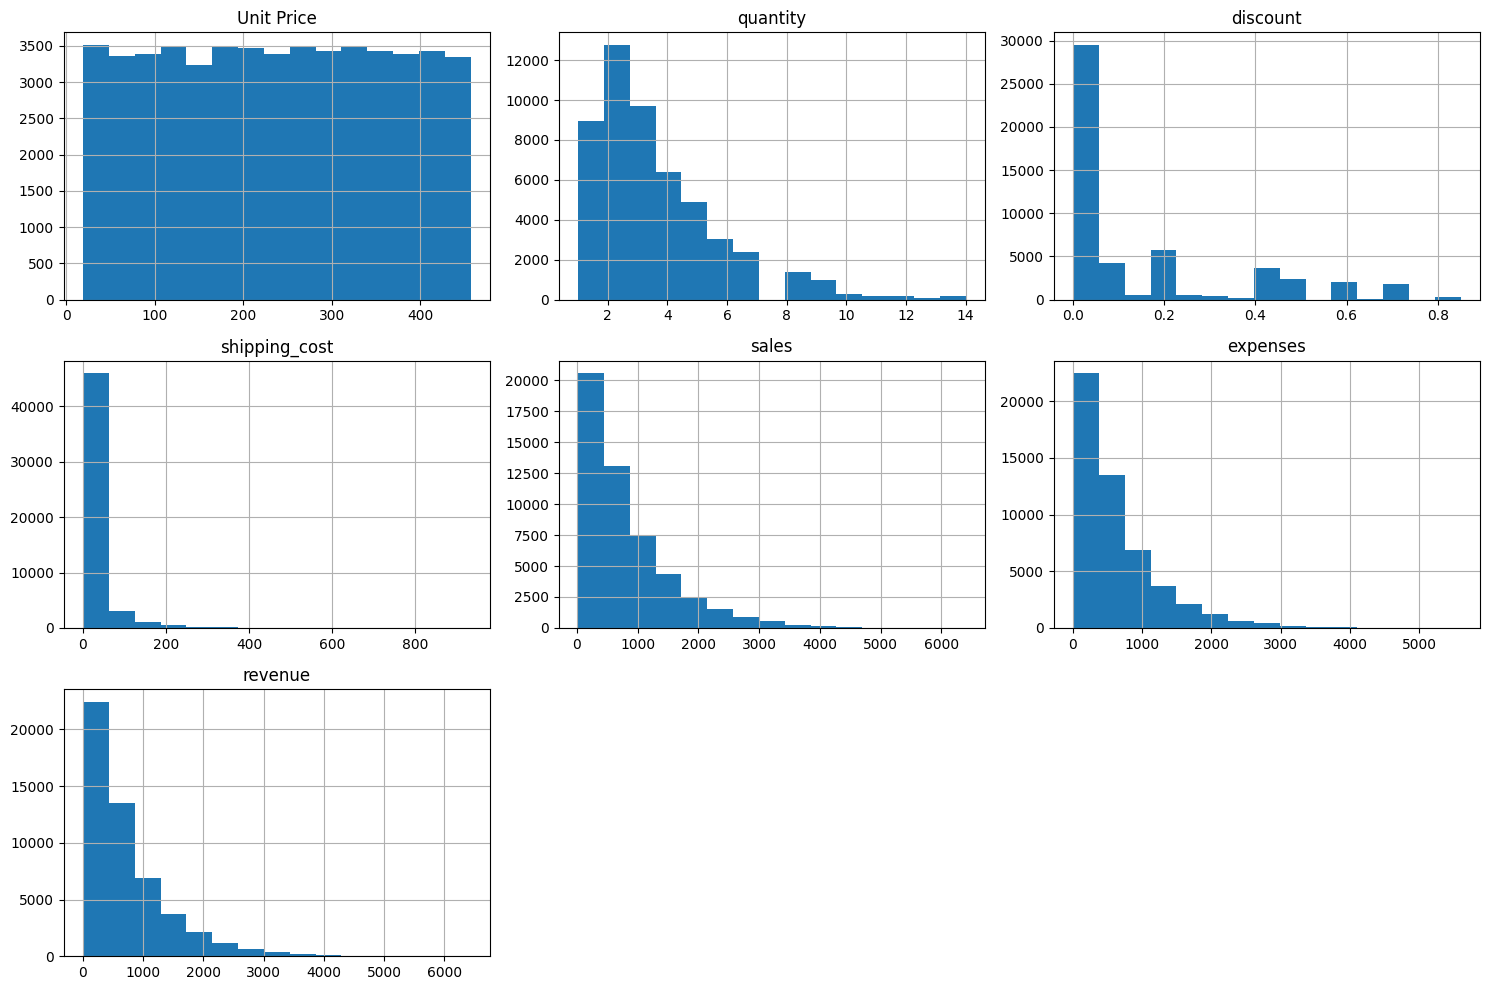

In [ ]:
# Histograma para variables numéricas
numerical_vars = ['Unit Price', 'quantity', 'discount', 'shipping_cost', 'sales', 'expenses', 'revenue']

df[numerical_vars].hist(bins=15,
                        figsize=(15, 10),
                        layout=(3, 3) #cuadrícula de 3 filas y 3 columnas
                        )
plt.tight_layout()
plt.show()

In [ ]:
#para proxima figura, es necesario entender siguiente codigo:
for i,col in enumerate(numerical_vars, 1): #genera índices automáticamente para cada elemento
  print(i, col)

1 Unit Price
2 quantity
3 discount
4 shipping_cost
5 sales
6 expenses
7 revenue


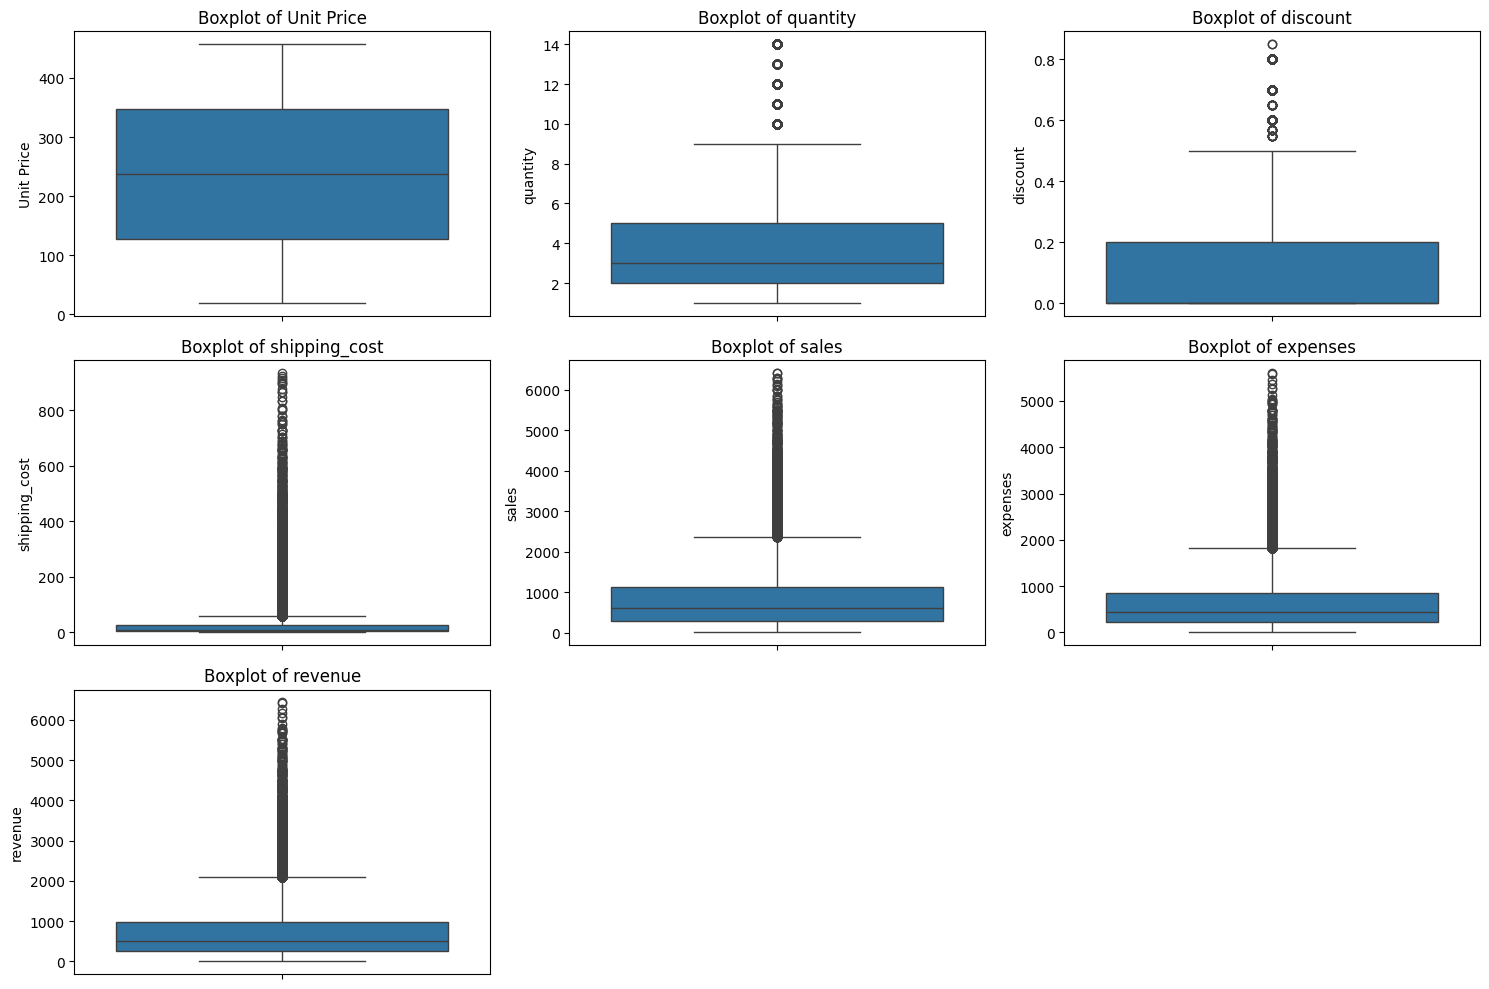

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Crear un boxplot para cada columna
for i, col in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)  # diseño de 3x3 (un máximo de 9 subplots), i es la posicion
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

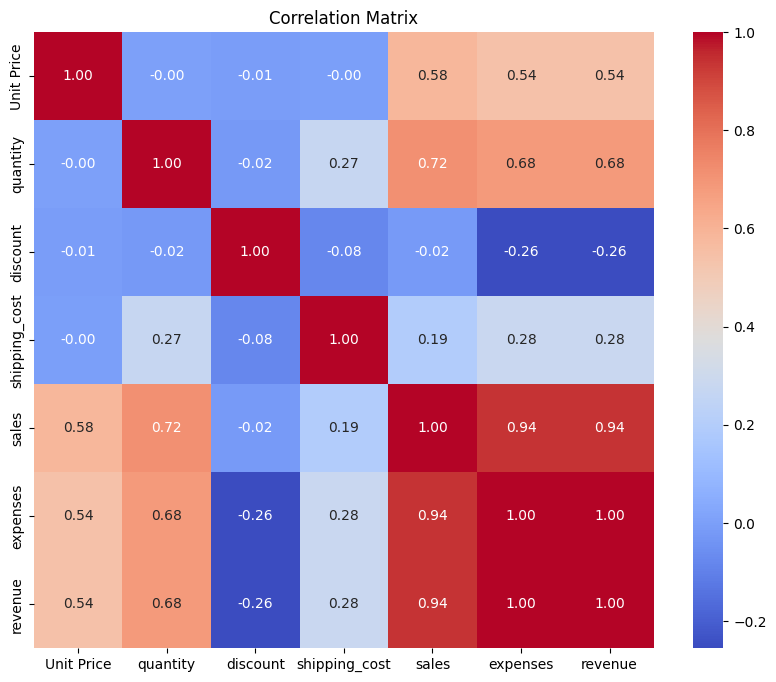

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_vars].corr(),
            annot=True,
            cmap='coolwarm',
            fmt='.2f' # solo mostrar dos decimales
            )
plt.title('Correlation Matrix')
plt.show()

**Alta correlacion (mas de 0.6) en:**
* Sales, Expenses, Revenue vs Quantity
* Expenses, Revenue vs Sales
* Revenue vs Expenses

# Explorando relaciones entre variables

In [ ]:
def plot_total_comparison(df, categorical_col, numerical_col):
    """
    Grafica el total de una variable numérica comparada con una variable categórica,
    ordenando los resultados de mayor a menor.

    Parameters:
    df (pd.DataFrame): DataFrame que contiene los datos.
    categorical_col (str): Nombre de la columna categórica para el eje X.
    numerical_col (str): Nombre de la columna numérica para el eje Y.
    """
    # Calcular el total por categoría
    total_data = df.groupby(categorical_col)[numerical_col].sum().reset_index()

    # Ordenar los datos de mayor a menor total
    total_data = total_data.sort_values(by=numerical_col, ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=categorical_col, y=numerical_col, data=total_data, color='teal')
    plt.title(f'Total {numerical_col} by {categorical_col.capitalize()}')
    plt.xlabel(categorical_col.capitalize()) #capitalize() es que primera letra este en MAYUS
    plt.ylabel(f'Total {numerical_col}')
    plt.xticks(rotation=45)
    plt.show()


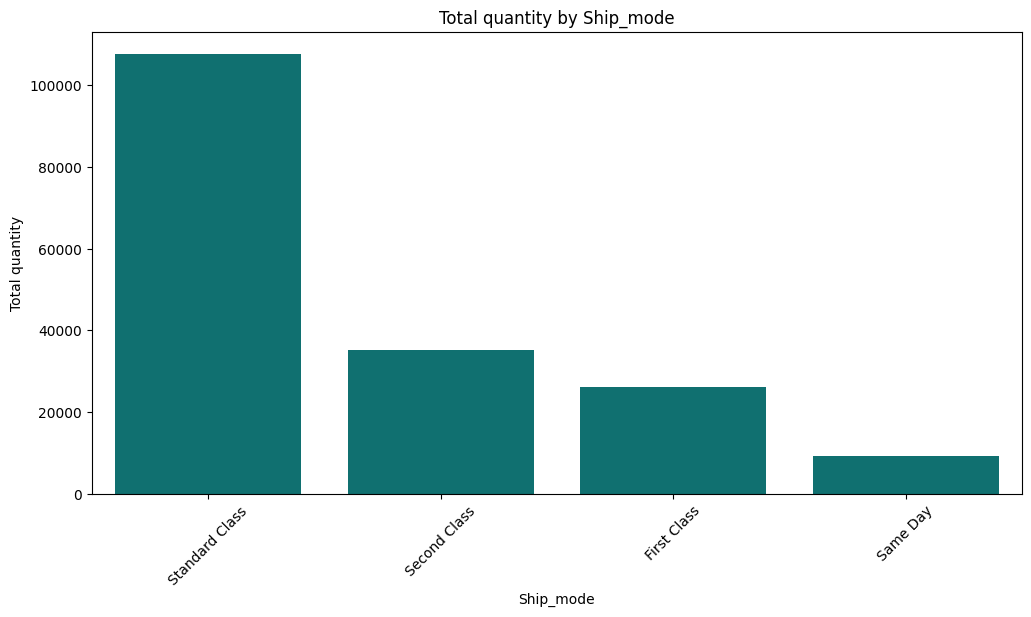

In [ ]:
plot_total_comparison(df,'ship_mode', 'quantity')

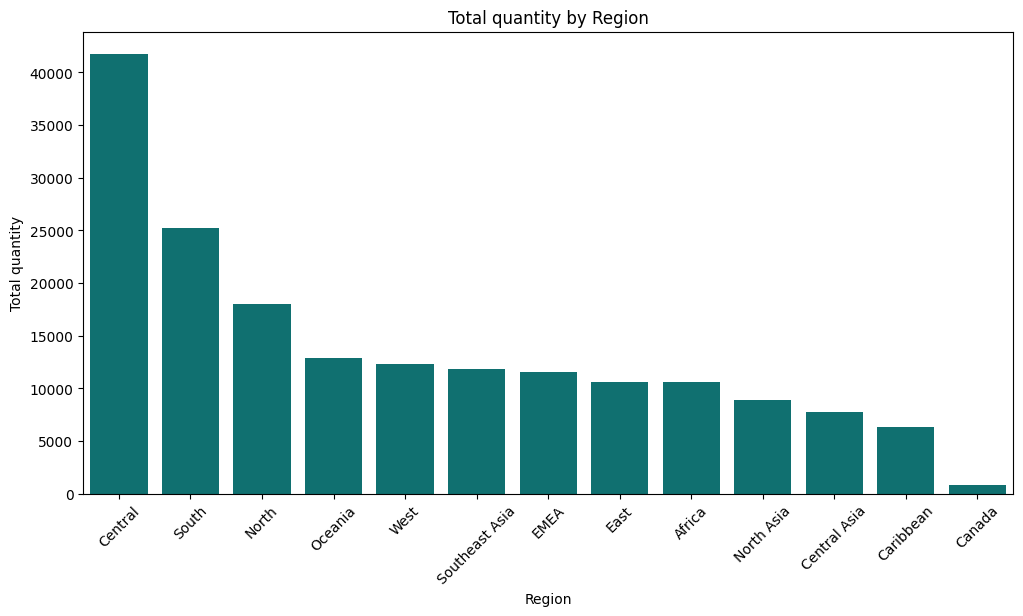

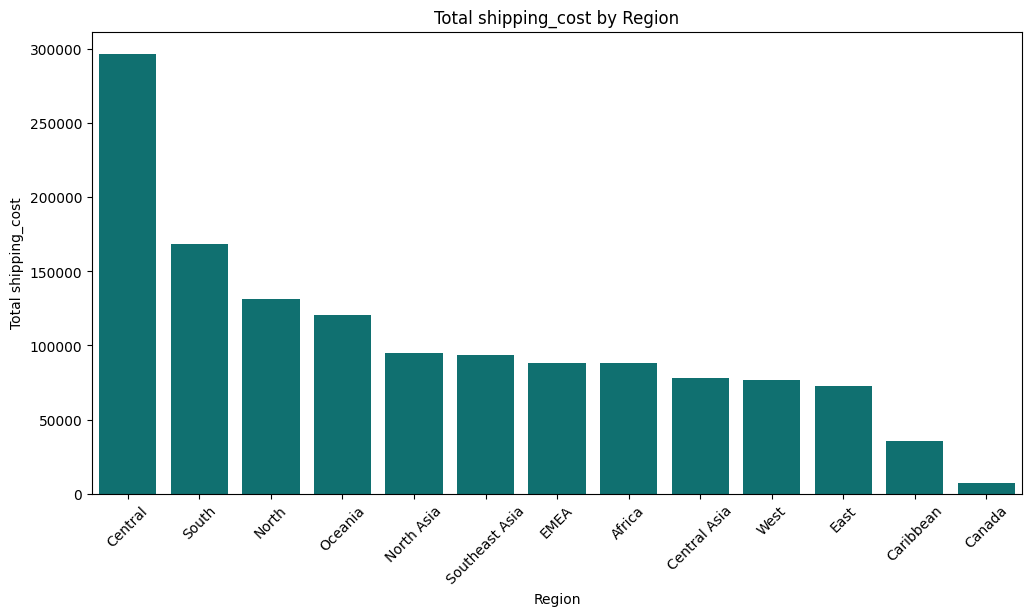

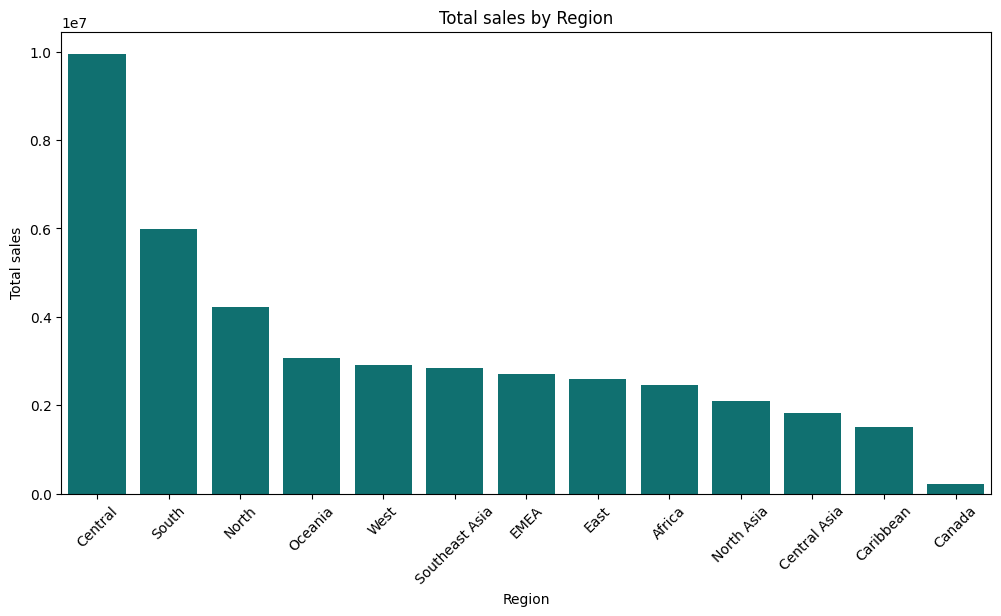

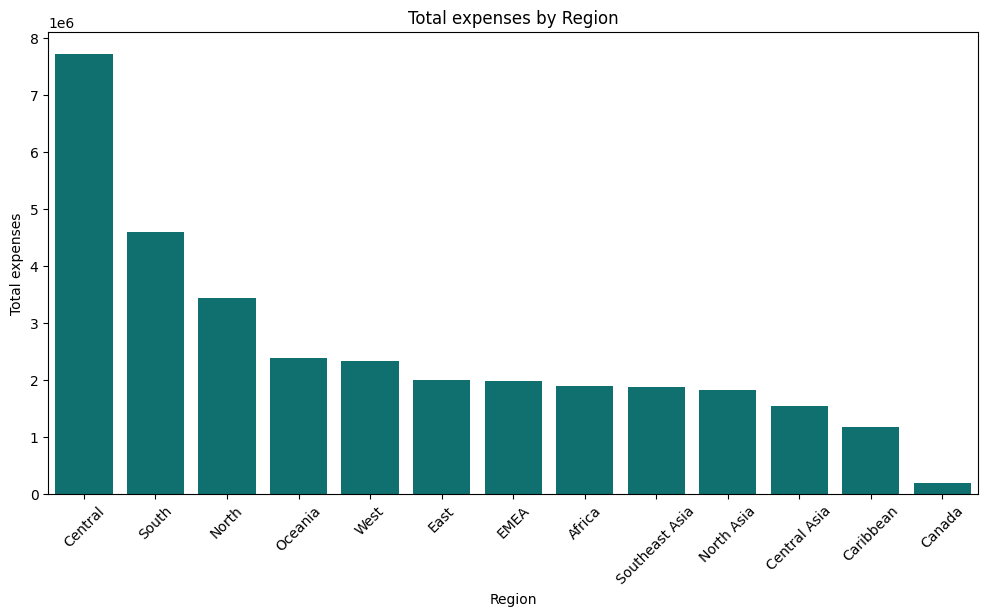

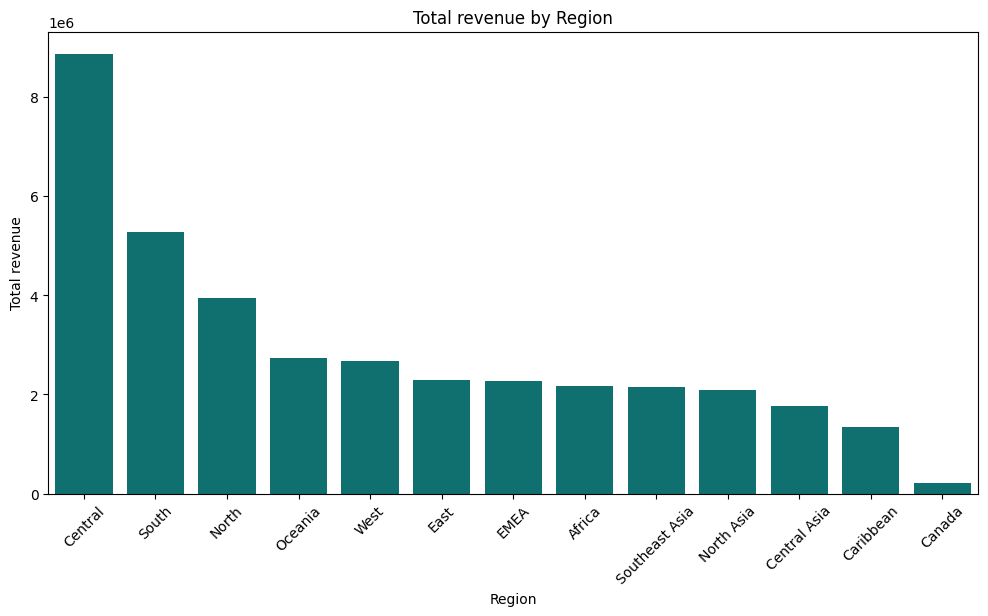

In [ ]:
# Ejemplo de uso de la función con la variable categórica 'region' y algunas variables numéricas
numerical_vars = ['quantity', 'shipping_cost', 'sales', 'expenses', 'revenue']
categorical_var = 'region'

# Llamar a la función para cada variable numérica
for var in numerical_vars:
    plot_total_comparison(df, categorical_var, var)

In [ ]:
total_by_region_df = df.groupby('region')[numerical_vars].sum().reset_index()
total_by_region_df

,region,quantity,shipping_cost,sales,expenses,revenue
0,Africa,10567,88143.17,2469098,1.892035e+06,2174752.670
1,Canada,833,7405.63,211951,1.908403e+05,219356.630
2,Caribbean,6310,35609.30,1508614,1.161921e+06,1335541.728
3,Central,41779,296958.35,9955575,7.722280e+06,8876183.984
4,Central Asia,7715,77830.15,1817909,1.544410e+06,1775183.750
5,EMEA,11521,88379.55,2708768,1.981372e+06,2277439.650
6,East,10625,72746.65,2595412,1.998766e+06,2297431.750
7,North,18027,131525.91,4221029,3.438095e+06,3951833.792
8,North Asia,8851,95030.61,2091507,1.813763e+06,2084784.610
9,Oceania,12838,120628.51,3073386,2.375066e+06,2729960.410


In [ ]:
# Agrupar por país y contar las regiones únicas
country_region_counts = df.groupby('country')['region'].nunique()

# Filtrar países que tienen más de una región única asignada
multiple_regions_countries = country_region_counts[country_region_counts > 1]

# Mostrar los resultados
if not multiple_regions_countries.empty:
    print('Países con más de una región única asignada:')
    for country, count in multiple_regions_countries.items():
        print(f'{country} - Cantidad de regiones: {count}')

Países con más de una región única asignada:
Austria - Cantidad de regiones: 2
Mongolia - Cantidad de regiones: 2
United States - Cantidad de regiones: 4


In [ ]:
def plot_top_10_total_comparison(df, categorical_col, numerical_col):
    """
    Grafica la suma total de una variable numérica comparada con una variable categórica,
    ordenando los resultados de mayor a menor y mostrando solo los 10 primeros resultados.

    Parameters:
    df (pd.DataFrame): DataFrame que contiene los datos.
    categorical_col (str): Nombre de la columna categórica para el eje X.
    numerical_col (str): Nombre de la columna numérica para el eje Y.
    """
    # Calcular la suma total por categoría
    total_data = df.groupby(categorical_col)[numerical_col].sum().reset_index()

    # Ordenar los datos de mayor a menor suma total
    total_data = total_data.sort_values(by=numerical_col, ascending=False)

    # Seleccionar los 10 primeros resultados
    top_10_data = total_data.head(10)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=categorical_col, y=numerical_col, data=top_10_data, color='purple')
    plt.title(f'Top 10 Totales de {numerical_col} por {categorical_col.capitalize()}')
    plt.xlabel(categorical_col.capitalize())
    plt.ylabel(f'Total {numerical_col}')
    plt.xticks(rotation=45)
    plt.show()

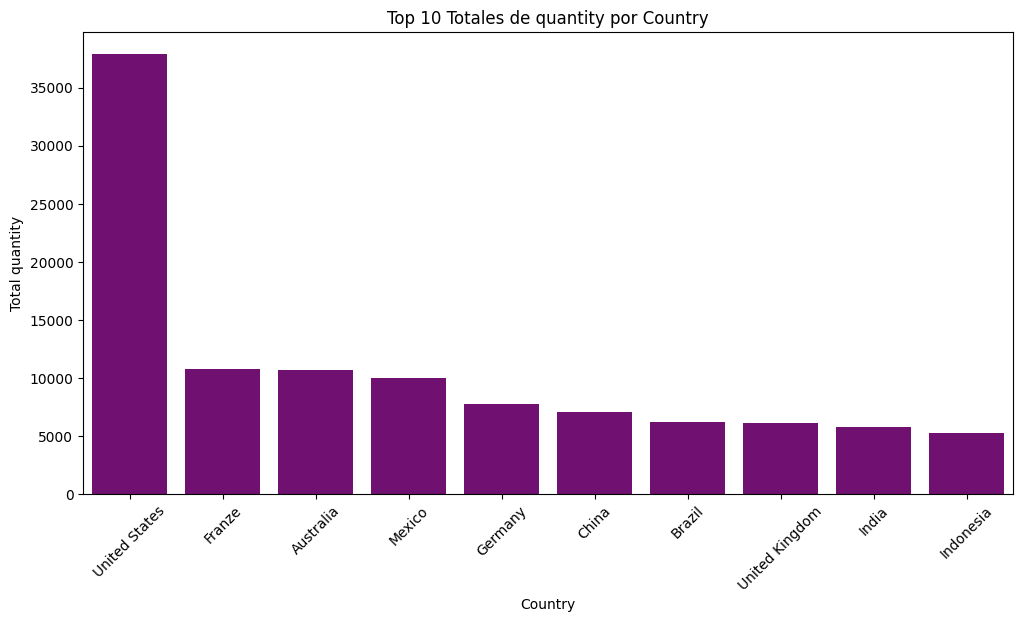

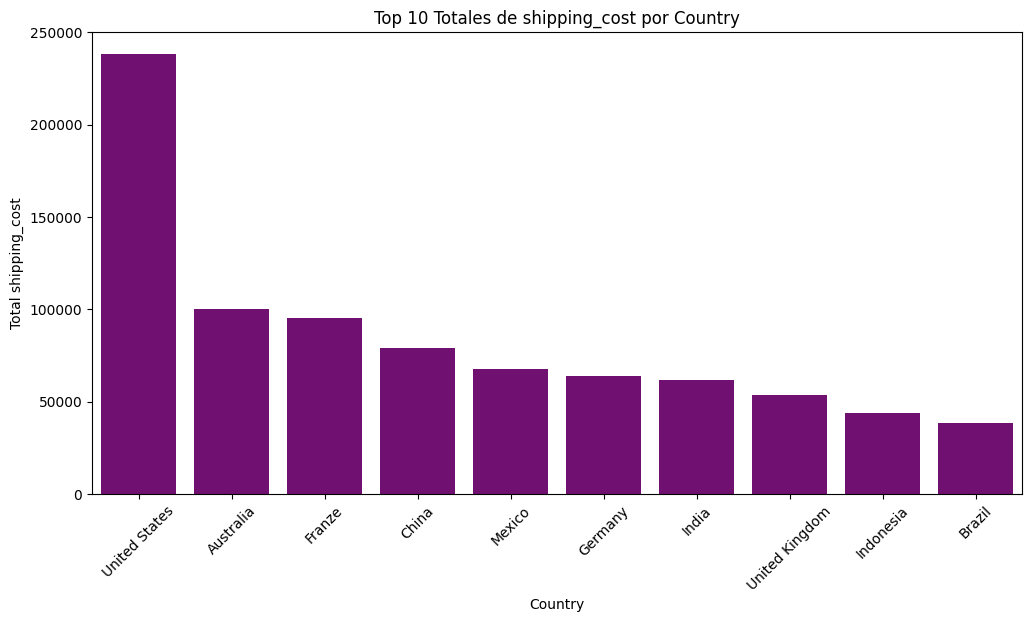

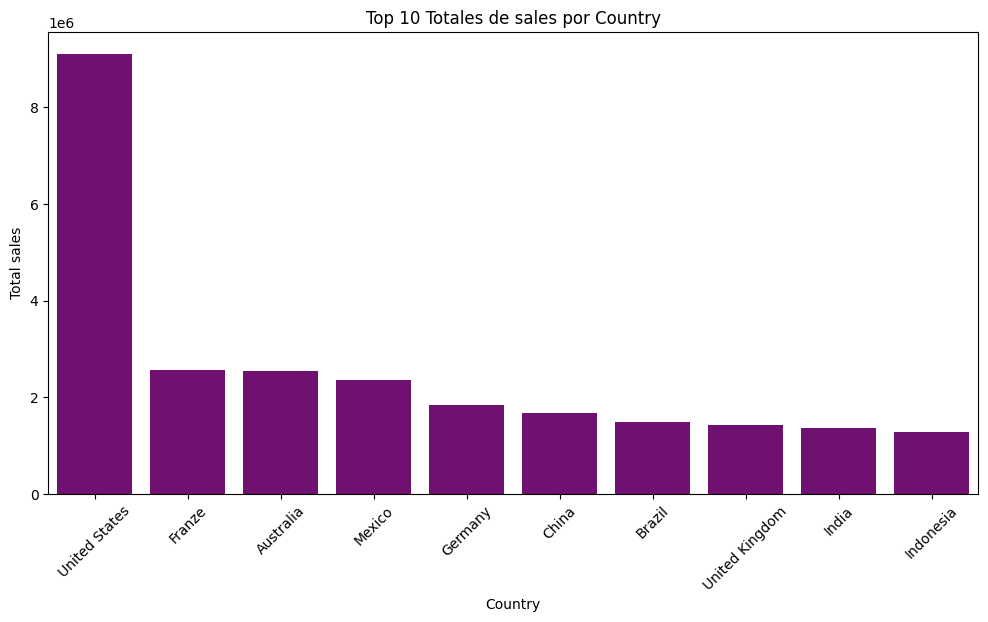

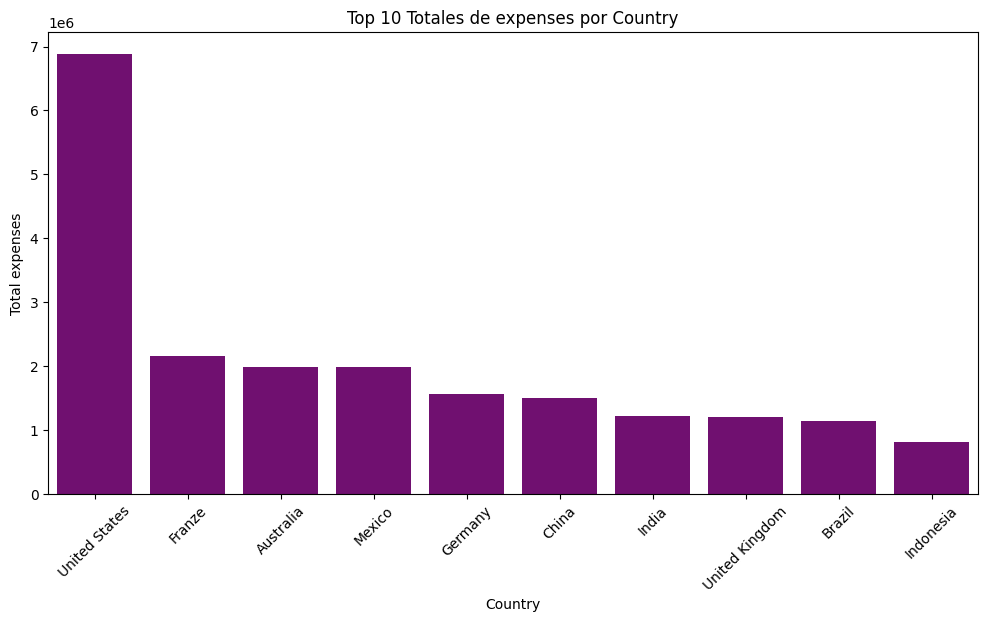

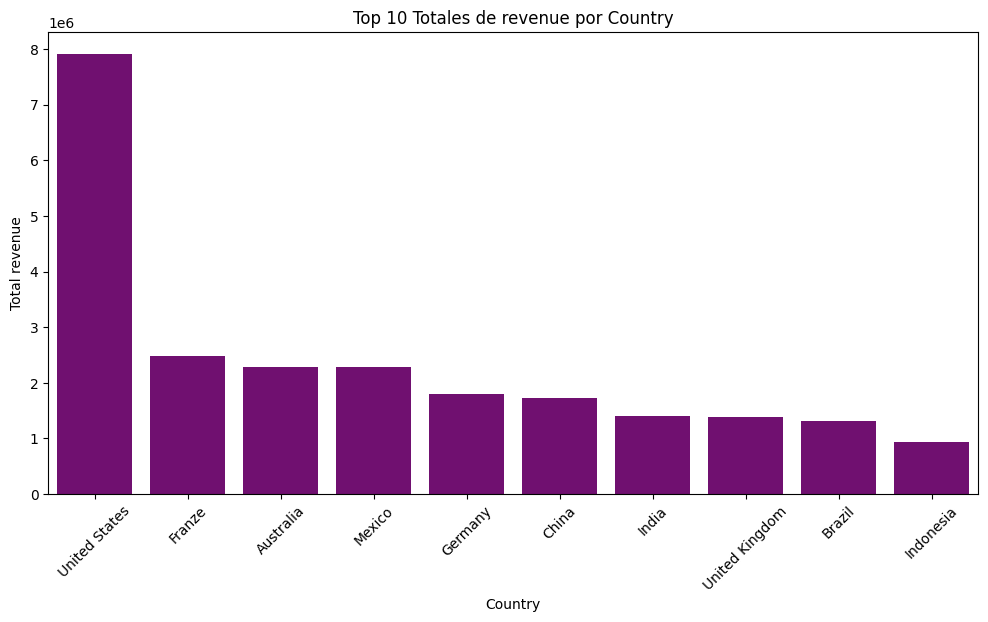

In [ ]:
for var in numerical_vars:
  plot_top_10_total_comparison(df,'country',var)

In [ ]:
def plot_bottom_10_total_comparison(df, categorical_col, numerical_col):
    """
    Grafica el total de una variable numérica comparada con una variable categórica,
    ordenando los resultados de menor a mayor y mostrando solo los 10 primeros resultados más bajos.

    Parameters:
    df (pd.DataFrame): DataFrame que contiene los datos.
    categorical_col (str): Nombre de la columna categórica para el eje X.
    numerical_col (str): Nombre de la columna numérica para el eje Y.
    """
    # Calcular el total por categoría
    total_data = df.groupby(categorical_col)[numerical_col].sum().reset_index()

    # Ordenar los datos de menor a mayor total
    total_data = total_data.sort_values(by=numerical_col, ascending=True)

    # Seleccionar los 10 primeros resultados más bajos
    bottom_10_data = total_data.head(10)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=categorical_col, y=numerical_col, data=bottom_10_data, color='salmon')
    plt.title(f'Bottom 10 Totales de {numerical_col} por {categorical_col.capitalize()}')
    plt.xlabel(categorical_col.capitalize())
    plt.ylabel(f'Total de {numerical_col}')
    plt.xticks(rotation=45)
    plt.show()

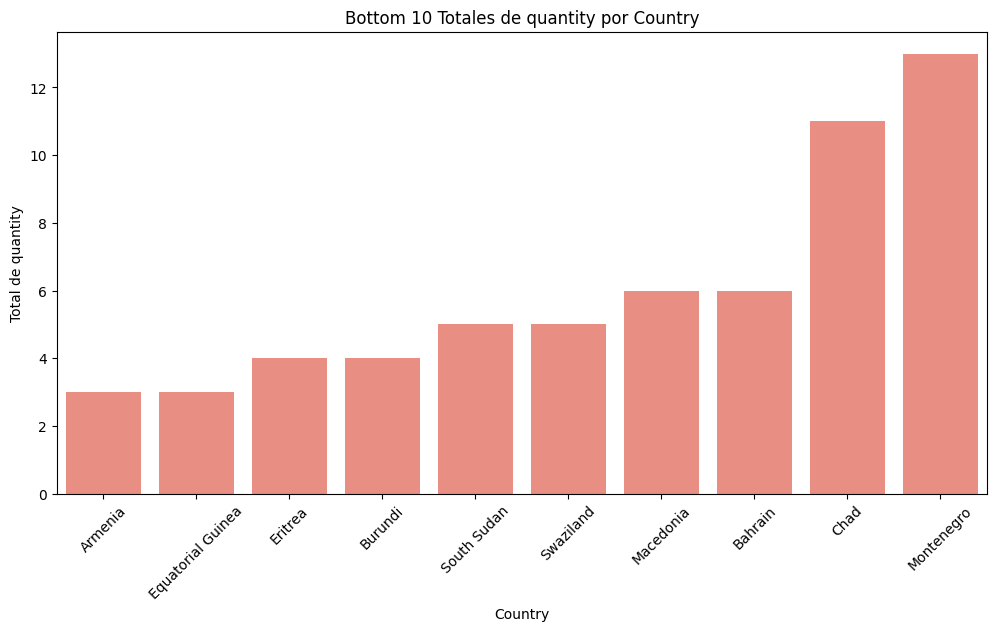

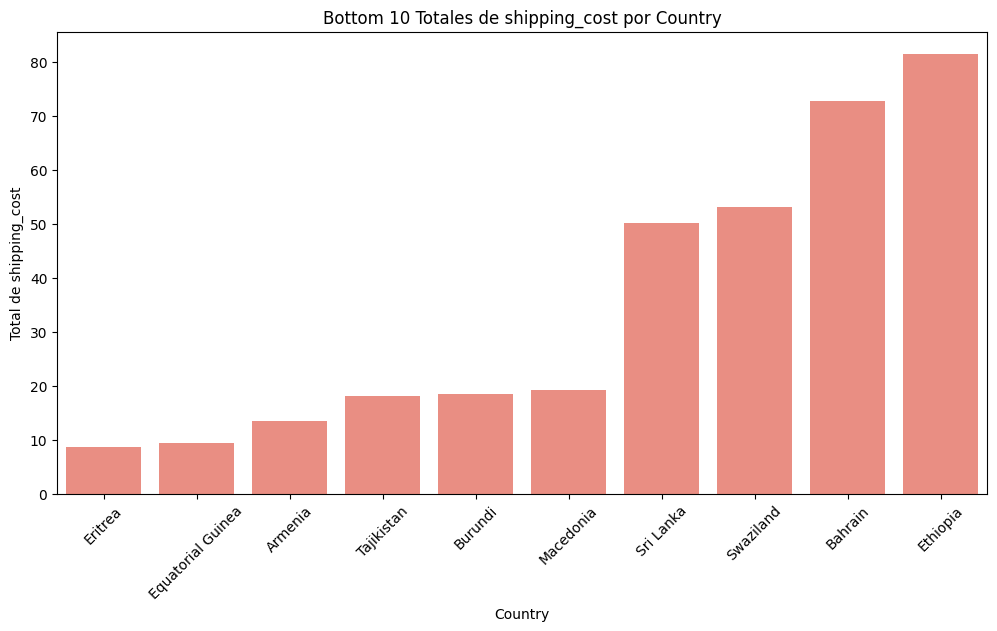

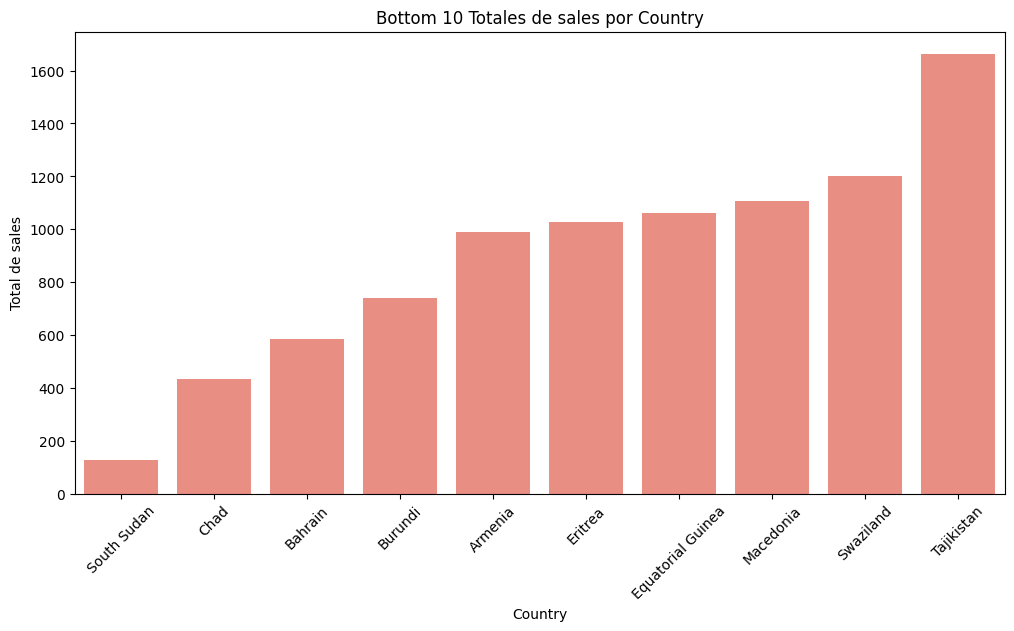

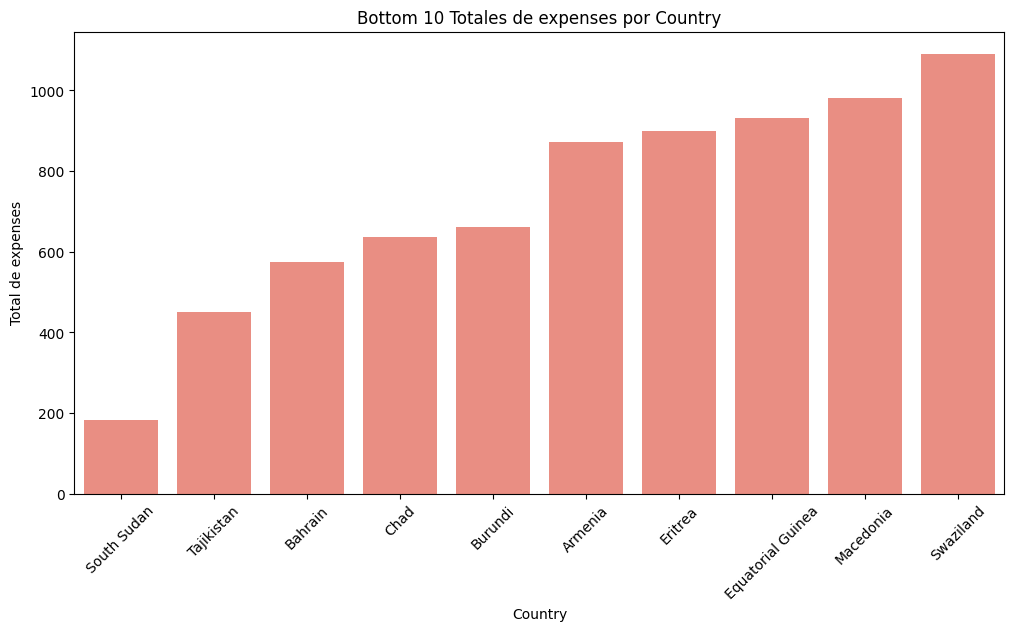

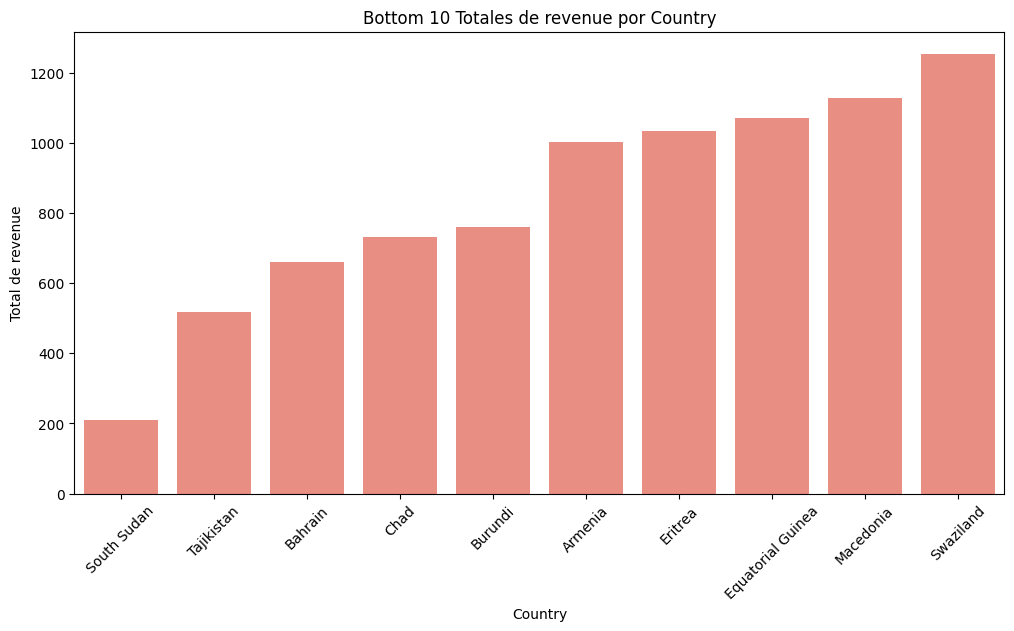

In [ ]:
for var in numerical_vars:
  plot_bottom_10_total_comparison(df, 'country', var)

In [ ]:
total_by_country_df = df.groupby('country')[numerical_vars].sum().reset_index()
total_by_country_df

,country,quantity,shipping_cost,sales,expenses,revenue
0,Afghanistan,228,2300.23,51918,47169.86010,54218.230
1,Albania,40,698.57,10805,10008.10590,11503.570
2,Algeria,454,3726.41,106483,95882.18670,110209.410
3,Angola,317,2418.40,72442,65128.54800,74860.400
4,Argentina,1504,6366.51,349916,180671.03646,207667.858
...,...,...,...,...,...,...
142,Venezuela,774,2810.06,184880,98307.45438,112997.074
143,Vietnam,996,7684.37,230465,158109.64140,181735.220
144,Yemen,71,286.63,18896,5181.22410,5955.430
145,Zambia,251,3067.20,54894,50426.24400,57961.200


**Teniendo en cuenta los años**

In [ ]:
total_by_country_year_df = df.groupby(['country', 'year'])[numerical_vars].sum().reset_index()
total_by_country_year_df

,country,year,quantity,shipping_cost,sales,expenses,revenue
0,Afghanistan,2011,46,165.22,11622,10254.8814,11787.22
1,Afghanistan,2012,61,1128.02,14403,13511.9874,15531.02
2,Afghanistan,2013,45,365.86,9774,8821.6782,10139.86
3,Afghanistan,2014,76,641.13,16119,14581.3131,16760.13
4,Albania,2011,15,308.18,3321,3157.3866,3629.18
...,...,...,...,...,...,...,...
534,Zambia,2014,75,511.65,14711,13243.7055,15222.65
535,Zimbabwe,2011,32,58.31,8071,2157.2607,2479.61
536,Zimbabwe,2012,51,147.06,12281,3333.2832,3831.36
537,Zimbabwe,2013,35,76.04,9396,2518.5108,2894.84


In [ ]:
total_by_country_year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        539 non-null    object 
 1   year           539 non-null    int64  
 2   quantity       539 non-null    int64  
 3   shipping_cost  539 non-null    float64
 4   sales          539 non-null    int64  
 5   expenses       539 non-null    float64
 6   revenue        539 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 29.6+ KB


In [ ]:
total_by_country_year_df['year'].unique()

array([2011, 2012, 2013, 2014, 2088, 2001])

In [ ]:
# Eliminar el año 2088 del DataFrame
total_by_country_year_df = total_by_country_year_df[total_by_country_year_df['year'] != 2088]
total_by_country_year_df['year'].unique()

array([2011, 2012, 2013, 2014, 2001])

In [ ]:
# Filtrar el DataFrame para obtener solo los datos del último año
last_year = total_by_country_year_df['year'].max()
last_year_data = total_by_country_year_df[total_by_country_year_df['year'] == last_year]

# Ordenar los datos por ventas
sorted_data = last_year_data.sort_values(by='sales', ascending=False)

# Seleccionar los 5 países con mayores ventas y los 5 países con menores ventas
top_5_countries = sorted_data.head(5)
low_5_countries = sorted_data.tail(5)

In [ ]:
low_5_countries

,country,year,quantity,shipping_cost,sales,expenses,revenue
462,Taiwan,2014,3,3.62,522,457.2894,525.62
260,Lebanon,2014,5,61.17,487,476.9079,548.17
447,Swaziland,2014,1,5.95,437,385.3665,442.95
276,Macedonia,2014,3,13.74,244,224.2338,257.74
434,South Sudan,2014,1,11.71,44,48.4677,55.71


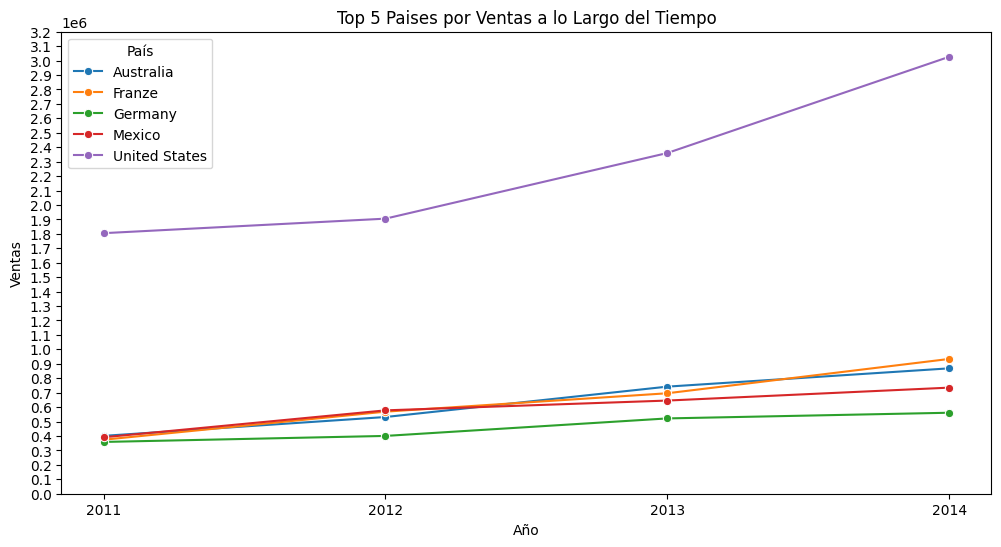

In [ ]:
# Obtener los países seleccionados para el top 5
selected_countries = top_5_countries['country'].unique()

# Filtrar el DataFrame original para obtener los datos de los países seleccionados
filtered_df = total_by_country_year_df[total_by_country_year_df['country'].isin(selected_countries)]

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='sales', hue='country', data=filtered_df, marker='o')
plt.title('Top 5 Paises por Ventas a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Ventas')

# Formatear el eje y para mostrar en incrementos de 100k
plt.yticks(ticks=range(0, int(plt.ylim()[1]) + 100000, 100000))

# Asegurar que el eje x esté en valores enteros
plt.xticks(ticks=range(filtered_df['year'].min(), filtered_df['year'].max() + 1))

plt.legend(title='País')
plt.show()

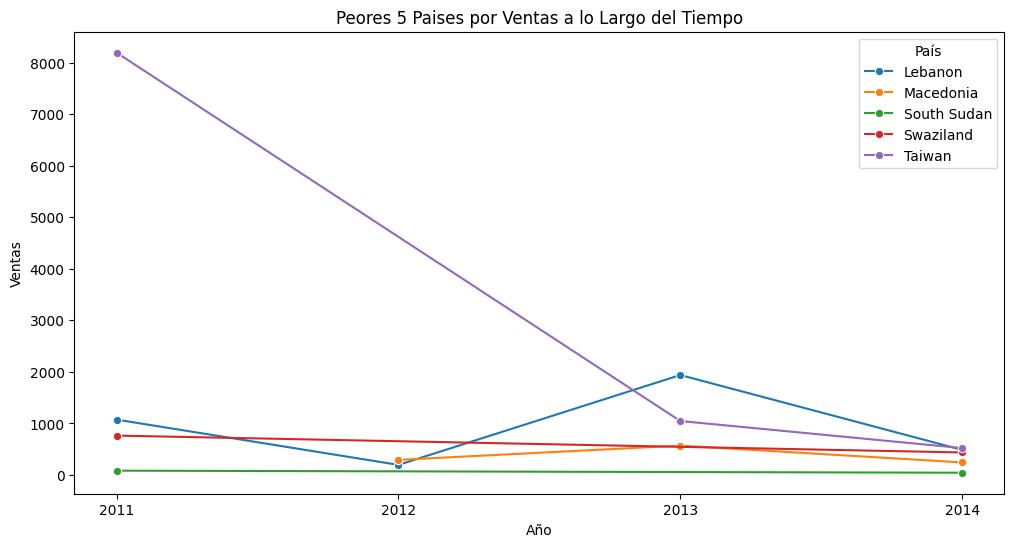

In [ ]:
# Obtener los países seleccionados para el low 5
selected_countries2 = low_5_countries['country'].unique()

# Filtrar el DataFrame original para obtener los datos de los países seleccionados
filtered_df2 = total_by_country_year_df[total_by_country_year_df['country'].isin(selected_countries2)]

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='sales', hue='country', data=filtered_df2, marker='o')
plt.title('Peores 5 Paises por Ventas a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Ventas')

# Asegurar que el eje x esté en valores enteros
plt.xticks(ticks=range(filtered_df2['year'].min(), filtered_df2['year'].max() + 1))

plt.legend(title='País')
plt.show()

## Adicional

Teniendo en cuenta las variables originales, que otras relaciones te parece interesante analizar?



    Order ID: ID de pedido único para cada cliente.
    Order Date: Fecha de pedido del producto.
    Ship Date: Fecha de envío del producto.
    Ship Mode: Modo de envío especificado por el cliente.
    Customer Name: Nombre del cliente.
    Segment: El segmento al que pertenece el cliente.
    State: Estado de residencia del cliente.
    Country: País de residencia del cliente.
    Market: El mercado del producto.
    Region: Región a la que pertenece el cliente.
    Product ID: ID único del producto.
    Category: Categoría del producto pedido.
    Sub-Category: Subcategoría del producto pedido.
    Product Name: Nombre del producto.
    Unit Price: El precio por unidad.
    Quantity: Cantidad del producto.
    Discount: Descuento proporcionado.
    Shipping Cost: El costo de envío.
    Order Priority: Los artículos enviados con prioridad se envían por aire, lo que resulta en tiempos de entrega más rápidos.
    Sales: Ventas del producto.
    Expenses: Los gastos son los costos de operación que una empresa incurre para generar ingresos.
    Revenue: Los ingresos se refieren a las ganancias totales.
    Year: Año de las ventas.



Como agruparias las variables para mostrar resultados?

---

